<a href="https://colab.research.google.com/github/stefisha/StefanVelickovic_Omega_DS_InvestmentRounds/blob/main/Investment_rounds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/drive/MyDrive/Data Science Task - VegaIT/python_task_data.csv'

In [ ]:
df = pd.read_csv(file_path)

### Loading the dataset

In [ ]:
df.head()

,permalink,company,numEmps,category,city,state,fundedDate,raisedAmt,raisedCurrency,round
0,lifelock,LifeLock,NaN,web,Tempe,AZ,1-May-07,6850000,USD,b
1,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Oct-06,6000000,USD,a
2,lifelock,LifeLock,NaN,web,Tempe,AZ,1-Jan-08,25000000,USD,c
3,mycityfaces,MyCityFaces,7.0,web,Scottsdale,AZ,1-Jan-08,50000,USD,seed
4,flypaper,Flypaper,NaN,web,Phoenix,AZ,1-Feb-08,3000000,USD,a


In [ ]:
print(df.columns)

Index(['permalink', 'company', 'numEmps', 'category', 'city', 'state',
       'fundedDate', 'raisedAmt', 'raisedCurrency', 'round'],
      dtype='object')


### Preprocessing

In [ ]:
# Fill missing values for numEmps using the median
df['numEmps'] = df['numEmps'].fillna(df['numEmps'].median())

# Convert fundedDate to datetime format
if 'fundedDate' in df.columns:
    df['fundedDate'] = pd.to_datetime(df['fundedDate'], errors='coerce')

    # Create a new column for fundedYear from the fundedDate
    df['fundedYear'] = df['fundedDate'].dt.year

    # Drop rows with missing fundedDate values
    df = df.dropna(subset=['fundedDate'])

    # Drop unwanted columns
    df = df.drop(columns=['permalink', 'company', 'fundedDate'])

# Convert categorical columns into dummy variables
columns_to_dummy = ['category', 'city', 'state', 'raisedCurrency']
available_columns = [col for col in columns_to_dummy if col in df.columns]

# Apply get_dummies only to available columns
df = pd.get_dummies(df, columns=available_columns, drop_first=True)

We might consider dropping these features:
### 1. Dropping `permalink`:
- **Reason**: The `permalink` column typically contains a unique identifier for each company or record, similar to an ID. While this is useful for tracking records, it doesn't contribute to the predictive power of a machine learning model.
- **Why drop?**: Since it doesn't provide any meaningful information for prediction, keeping it can add unnecessary complexity.

### 2. Dropping `company`:
- **Reason**: The `company` column usually contains the name of the company. The company name is categorical data, but it likely has no direct influence on the prediction target (such as funding round type).
- **Why drop?**: Similar to `permalink`, the company name doesn't add value to the model. Using it could overfit the model to specific company names, which is not desirable in most cases.

### 3. Dropping `fundedDate`:
- **Reason**: In the preprocessing step, you extract the year (`fundedYear`) from the `fundedDate`, which is likely more relevant for prediction.
- **Why drop?**: After extracting the useful part (the year), the full date isn't needed for the prediction task, and keeping it might add unnecessary complexity. The exact timestamp of the funding event typically does not provide additional predictive power compared to just the year.

### Summary:
- **`permalink` and `company`**: These columns act as identifiers and are not helpful for predicting the target variable.
- **`fundedDate`**: We already extracted the important information (the year), so the full date is no longer needed.

In [ ]:
print(df.columns)

Index(['numEmps', 'raisedAmt', 'round', 'fundedYear', 'category_cleantech',
       'category_consulting', 'category_hardware', 'category_mobile',
       'category_other', 'category_software',
       ...
       'state_OR', 'state_PA', 'state_RI', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_WA', 'raisedCurrency_EUR', 'raisedCurrency_USD'],
      dtype='object', length=237)


In [ ]:
df.head()

,numEmps,raisedAmt,round,fundedYear,category_cleantech,category_consulting,category_hardware,category_mobile,category_other,category_software,...,state_OR,state_PA,state_RI,state_TN,state_TX,state_UT,state_VA,state_WA,raisedCurrency_EUR,raisedCurrency_USD
0,20.0,6850000,b,2007,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,20.0,6000000,a,2006,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,20.0,25000000,c,2008,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,7.0,50000,seed,2008,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,20.0,3000000,a,2008,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### Modeling

In [ ]:
# Defining the features (X) and target variable (y)
X = df.drop(columns=['round'])
y = df['round']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode the target variable (round)
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a basic Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

In [ ]:
# Output the results
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Model Accuracy: 45.21%
Classification Report:
              precision    recall  f1-score   support

           a       0.53      0.61      0.57       122
       angel       0.41      0.33      0.37        27
           b       0.32      0.42      0.36        74
           c       0.43      0.22      0.29        27
           d       0.33      0.10      0.15        10
  debt_round       0.00      0.00      0.00         4
           e       0.00      0.00      0.00         1
        seed       0.67      0.42      0.51        24
unattributed       0.00      0.00      0.00         3

    accuracy                           0.45       292
   macro avg       0.30      0.23      0.25       292
weighted avg       0.45      0.45      0.44       292



In [ ]:
def calculate_and_print_metrics(y_true, y_pred):
    """
    Calculate and print evaluation metrics: accuracy, precision, recall, and F1-score.

    Parameters:
    - y_true: The true labels
    - y_pred: The predicted labels
    """
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1_score': f1_score(y_true, y_pred, average='weighted')
    }

    # Print the metrics
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print(f"Precision: {metrics['precision']:.2f}")
    print(f"Recall: {metrics['recall']:.2f}")
    print(f"F1 Score: {metrics['f1_score']:.2f}")

In [ ]:
from xgboost import XGBClassifier
# Step 6: Train the XGBoost model
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [ ]:
# Calculate and print the metrics
calculate_and_print_metrics(y_test, y_pred)

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.49
Precision: 0.46
Recall: 0.49
F1 Score: 0.47

Classification Report:
              precision    recall  f1-score   support

           a       0.59      0.69      0.63       122
       angel       0.50      0.30      0.37        27
           b       0.39      0.46      0.42        74
           c       0.24      0.19      0.21        27
           d       0.00      0.00      0.00        10
  debt_round       0.00      0.00      0.00         4
           e       0.00      0.00      0.00         1
        seed       0.61      0.46      0.52        24
unattributed       0.00      0.00      0.00         3

    accuracy                           0.49       292
   macro avg       0.26      0.23      0.24       292
weighted avg       0.46      0.49      0.47       292



### 1. Handle Class Imbalance
- **Problem**: The dataset might have imbalanced classes where some funding rounds (e.g., 'angel', 'seed') have fewer samples compared to others (e.g., 'a', 'b').
- **Solution**: Apply **SMOTE (Synthetic Minority Over-sampling Technique)** to generate synthetic samples for underrepresented classes and balance the dataset.

### 2. Hyperparameter Tuning
- **Problem**: The default hyperparameters may not be optimal for the XGBoost model, limiting its performance.
- **Solution**: Use **RandomizedSearchCV** or **GridSearchCV** to tune hyperparameters and find the best set of parameters for the model, improving accuracy, precision, recall, and F1-score.

### 3. Cross-Validation
- **Problem**: The performance on a single test set might not generalize well to unseen data.
- **Solution**: Use **cross-validation** (such as 5-fold or 10-fold) to evaluate the model on multiple subsets of the data and get a more robust performance estimate.

### 4. Feature Scaling
- **Problem**: Features with large variations in value (like `raisedAmt`) can negatively impact the model's performance.
- **Solution**: Normalize the feature values using **MinMaxScaler** or **StandardScaler**, especially for algorithms sensitive to feature magnitude (like XGBoost).

### 5. Feature Importance and Selection
- **Problem**: Some features might not contribute much to the prediction, while others might have more predictive power.
- **Solution**: Analyze **feature importance** after training and consider selecting the most important features or removing less important ones to improve model efficiency.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from scipy.stats import randint, uniform

In [ ]:
# Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Feature Scaling using MinMaxScaler
scaler = MinMaxScaler()
X_resampled = scaler.fit_transform(X_resampled)

In [ ]:
# Hyperparameter Tuning for XGBoost using RandomizedSearchCV
xgb = XGBClassifier(random_state=42, use_label_encoder=False)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
# from imblearn.over_sampling import SMOTE
# from scipy.stats import randint, uniform

# # Load the dataset
# file_path = '/content/drive/MyDrive/Data Science Task - VegaIT/python_task_data.csv'
# df = pd.read_csv(file_path)

# # Preprocessing
# df['numEmps'] = df['numEmps'].fillna(df['numEmps'].median())
# df['fundedDate'] = pd.to_datetime(df['fundedDate'], errors='coerce')
# df['fundedYear'] = df['fundedDate'].dt.year
# df = df.drop(columns=['permalink', 'company', 'fundedDate'])

# # Convert categorical columns into dummy variables
# columns_to_dummy = ['category', 'city', 'state', 'raisedCurrency']
# df = pd.get_dummies(df, columns=columns_to_dummy, drop_first=True)

# # Define features and target variable
# X = df.drop(columns=['round'])
# y = df['round']

# # Handle class imbalance with SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Scale features
# scaler = MinMaxScaler()
# X_resampled = scaler.fit_transform(X_resampled)

# # Encode target variable
# le = LabelEncoder()
# y_resampled = le.fit_transform(y_resampled)

# # Train/test split
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# # Helper function to evaluate and print metrics
# def calculate_and_print_metrics(y_true, y_pred):
#     metrics = {
#         'accuracy': accuracy_score(y_true, y_pred),
#         'precision': precision_score(y_true, y_pred, average='weighted'),
#         'recall': recall_score(y_true, y_pred, average='weighted'),
#         'f1_score': f1_score(y_true, y_pred, average='weighted')
#     }
#     print(f"Accuracy: {metrics['accuracy']:.2f}")
#     print(f"Precision: {metrics['precision']:.2f}")
#     print(f"Recall: {metrics['recall']:.2f}")
#     print(f"F1 Score: {metrics['f1_score']:.2f}")

# # Hyperparameter grids for each model
# param_grids = {
#     'Random Forest': {
#         'n_estimators': randint(100, 500),
#         'max_depth': randint(3, 20),
#         'min_samples_split': randint(2, 20)
#     },
#     # 'SVC': {
#     #     'C': uniform(0.1, 10),
#     #     'kernel': ['linear', 'rbf', 'poly'],
#     #     'gamma': ['scale', 'auto']
#     # },
#     'XGBoost': {
#         'n_estimators': randint(100, 500),
#         'max_depth': randint(3, 20),
#         'learning_rate': uniform(0.01, 0.3),
#         'subsample': uniform(0.5, 1.0),
#         'colsample_bytree': uniform(0.5, 1.0)
#     },
#     'Logistic Regression': {
#         'C': uniform(0.1, 10),
#         'solver': ['liblinear', 'lbfgs'],
#         'max_iter': [100, 200, 300]
#     },
#     'K-Nearest Neighbors': {
#         'n_neighbors': randint(1, 20),
#         'weights': ['uniform', 'distance'],
#         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#     },
#     'Decision Tree': {
#         'max_depth': randint(3, 20),
#         'min_samples_split': randint(2, 20)
#     }
# }

# # Train and evaluate individual models with hyperparameter tuning
# def train_and_evaluate_models_with_tuning(X_train, X_test, y_train, y_test):
#     models = {
#         'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
#         # 'SVC': SVC(class_weight='balanced', probability=True, random_state=42),
#         'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False),
#         'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
#         'K-Nearest Neighbors': KNeighborsClassifier(),
#         'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42)
#     }

#     results = []
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#     for model_name, model in models.items():
#         print(f"\nTraining and Tuning {model_name}...")

#         # Perform hyperparameter tuning using RandomizedSearchCV
#         random_search = RandomizedSearchCV(model, param_grids[model_name], n_iter=20, cv=cv, random_state=42, n_jobs=-1)
#         random_search.fit(X_train, y_train)

#         best_model = random_search.best_estimator_
#         print(f"Best Parameters for {model_name}: {random_search.best_params_}")

#         # Train the best model and evaluate
#         best_model.fit(X_train, y_train)
#         y_pred = best_model.predict(X_test)

#         # Print classification report
#         print(f"\nClassification Report for {model_name}:\n")
#         print(classification_report(y_test, y_pred, target_names=le.classes_))

#         # Store model results
#         accuracy = accuracy_score(y_test, y_pred)
#         precision = precision_score(y_test, y_pred, average='weighted')
#         recall = recall_score(y_test, y_pred, average='weighted')
#         f1 = f1_score(y_test, y_pred, average='weighted')

#         results.append({
#             'Model': model_name,
#             'Accuracy': accuracy,
#             'Precision': precision,
#             'Recall': recall,
#             'F1 Score': f1
#         })

#     return results

# # Function to visualize the results
# def plot_metrics(results):
#     # Extract model names and their corresponding metrics
#     models = [result['Model'] for result in results]
#     accuracy = [result['Accuracy'] for result in results]
#     precision = [result['Precision'] for result in results]
#     recall = [result['Recall'] for result in results]
#     f1_score = [result['F1 Score'] for result in results]

#     # Create bar chart for each metric
#     metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
#     metric_values = [accuracy, precision, recall, f1_score]

#     # Plot each metric in a separate subplot
#     fig, axs = plt.subplots(2, 2, figsize=(12, 10))
#     for i, ax in enumerate(axs.flat):
#         ax.barh(models, metric_values[i], color='b')
#         ax.set_title(metrics[i])
#         ax.set_xlim(0, 1)

#     plt.tight_layout()
#     plt.show()

# # Train and evaluate models with hyperparameter tuning
# results = train_and_evaluate_models_with_tuning(X_train, X_test, y_train, y_test)

# # Print model results
# for result in results:
#     print(result)

# # Plot metrics for the models
# plot_metrics(results)

# # Voting Classifier combining the best models
# def voting_classifier(X_train, X_test, y_train, y_test):
#     # Retrieve the best models for Random Forest and XGBoost
#     rf_best = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
#     xgb_best = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)

#     # Voting Classifier
#     voting_clf = VotingClassifier(
#         estimators=[
#             ('random_forest', rf_best),
#             ('svc', SVC(probability=True, random_state=42)),
#             ('xgboost', xgb_best)
#         ], voting='soft'
#     )

#     # Cross-validation with voting classifier
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     scores = cross_val_score(voting_clf, X_train, y_train, cv=cv, scoring='accuracy')
#     print(f"Voting Classifier Cross-validation Accuracy: {scores.mean() * 100:.2f}%")

#     # Train and evaluate voting classifier
#     voting_clf.fit(X_train, y_train)
#     y_pred = voting_clf.predict(X_test)

#     # Calculate and print metrics
#     print("\nClassification Report for Voting Classifier:\n")
#     print(classification_report(y_test, y_pred, target_names=le.classes_))

#     calculate_and_print_metrics(y_test, y_pred)

# # Train and evaluate voting classifier
# voting_classifier(X_train, X_test, y_train, y_test)


In [ ]:
# Define parameter distributions for tuning
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 20),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 1.0),
    'colsample_bytree': uniform(0.5, 1.0)
}

In [ ]:
# Randomized search with 5-fold cross-validation
random_search = RandomizedSearchCV(xgb, param_distributions, n_iter=20, scoring='accuracy', cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
70 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1531, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
  

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7893b8129a20>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7893b832ca00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7893b812ba60>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7893b838ee90>},
                   random_state=42, scoring='accuracy')

In [ ]:
# Best model after hyperparameter tuning
best_model = random_search.best_estimator_

In [ ]:
# Cross-Validation (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_resampled, y_resampled, cv=cv, scoring='accuracy')

In [ ]:
# Evaluate model on test set
X_test = scaler.transform(X_test)  # Apply scaling to the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Print cross-validation score
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Print metrics for the test set
calculate_and_print_metrics(y_test, y_pred)

Cross-Validation Accuracy: 86.22%
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


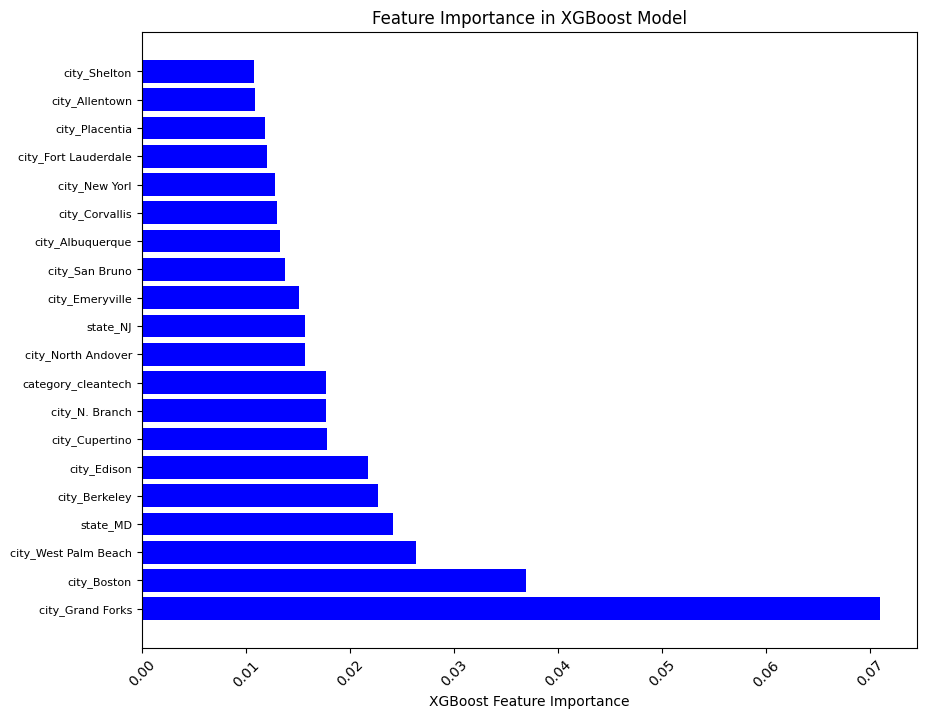

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances from the trained XGBoost model
xgb_importances = best_model.feature_importances_

# Sort the feature importances in descending order
sorted_idx = np.argsort(xgb_importances)[::-1]

# Limit to top N features for better visibility
N = 20  # Adjust this number based on how many features you want to display
sorted_idx = sorted_idx[:N]

# Plot the feature importances
plt.figure(figsize=(10, 8))  # Further increase size if necessary
plt.barh(df.columns[sorted_idx], xgb_importances[sorted_idx], color='blue')
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance in XGBoost Model")

# Rotate the labels to avoid overlap
plt.xticks(rotation=45)

# Optionally reduce font size if necessary
plt.tick_params(axis='y', which='major', labelsize=8)

# Show the plot
plt.show()

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Calculate mutual information between features and target
mutual_info = mutual_info_classif(df.drop(columns=['round']), y)

# Step 2: Sort features by their mutual information score
feature_ranking = pd.Series(mutual_info, index=df.drop(columns=['round']).columns).sort_values(ascending=False)

# Step 3: Set a threshold for mutual information and select features
threshold = 0.005  # Adjust this value if needed
selected_features = feature_ranking[feature_ranking > threshold].index

print(f"Selected Features based on Mutual Information:\n{selected_features}")

# Step 4: Limit to the top N features (we'll try 20 as a starting point)
N = 20
top_features = selected_features[:N]
print(f"Top {N} Features Selected:\n{top_features}")

# Step 5: Ensure all selected features are numeric
print(df[top_features].dtypes)  # Confirm the data types are numeric (no categorical variables)

# Step 6: Scaling the features
scaler = MinMaxScaler()
X_top_scaled = scaler.fit_transform(df[top_features])

# Step 7: Use SMOTE to balance the classes in the target variable
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_top_scaled, y)

# Step 8: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 9: Set up the XGBoost classifier with regularization and use GridSearchCV for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate (step size)
    'max_depth': [3, 5, 7],               # Maximum depth of the trees
    'n_estimators': [50, 100, 200],       # Number of trees in the model
    'reg_alpha': [0.1, 1, 10],            # L1 regularization (lasso)
    'reg_lambda': [0.1, 1, 10]            # L2 regularization (ridge)
}

xgb_model = XGBClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Step 10: Best model from grid search
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Step 11: Train the best model and make predictions
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Step 12: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with Top {N} Features and GridSearchCV: {accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Selected Features based on Mutual Information:
Index(['raisedAmt', 'numEmps', 'fundedYear', 'city_Aliso Viejo', 'city_Toledo',
       'city_Leesburg', 'city_Livermore', 'state_WA', 'state_MN',
       'city_Boston', 'city_Brisbane', 'city_Maynard', 'city_Monterey',
       'city_Sherman Oaks', 'category_web', 'category_mobile', 'city_Media',
       'city_Richfield', 'raisedCurrency_EUR', 'city_Marina del Rey',
       'city_Watertown', 'state_VA', 'state_DC', 'state_ND',
       'category_consulting', 'city_Irvine', 'city_San Jose',
       'city_Livingston', 'city_Philadelphia', 'city_Washington',
       'city_Los Angeles', 'state_CT', 'city_Chicago', 'city_Provo',
       'state_MD', 'city_Richardson', 'city_Sausalito', 'city_Chantilly',
       'city_Silver Spring', 'city_Burlington', 'city_Ir vine',
       'city_San Mateo', 'city_New Yorl', 'city_Naples', 'city_Carrollton',
       'city_Carlsbad', 'city_Baltimore', 'city_Patchogue', 'state_MO',
       'city_Miami', 'city_Cary', 'category_

In [ ]:
import joblib

# Assuming best_model is your trained model
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the column names
joblib.dump(X_train.columns, 'expected_columns.pkl')

# Now, convert to NumPy arrays for model training (if needed)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)